In [46]:
# load a coffea file
from coffea.util import load
import os
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib
matplotlib.rcParams["figure.dpi"] = 300


In [47]:

input = "/pnfs/psi.ch/cms/trivcat/store/user/mmalucch/out_HH4b//out_norm/output_all.coffea"
input = "/work/mmalucch/out_norm/output_all.coffea"
o = load(f"{input}")
vars=o["variables"]

In [48]:
h=vars["JetGood_eta"]['GluGlutoHHto4B']['GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2018']
print(h)

Hist(
  StrCategory(['baseline'], name='cat', label='Category'),
  StrCategory(['nominal', 'luminosityDown', 'luminosityUp', 'pileupDown', 'pileupUp', 'xsec_ggHH4bDown', 'xsec_ggHH4bUp'], name='variation', label='Variation'),
  Regular(50, -2.5, 2.5, name='JetGood.eta', label='$\\eta_{j}$'),
  storage=Weight()) # Sum: WeightedSum(value=5213.78, variance=7.36288)


In [49]:
print(h[0,0,:])

                   ┌─────────────────────────────────────────────────────────┐
[-inf, -2.5) 0     │                                                         │
[-2.5, -2.4) 2.619 │█████▋                                                   │
[-2.4, -2.3) 3.45  │███████▍                                                 │
[-2.3, -2.2) 4.13  │████████▊                                                │
[-2.2, -2.1) 4.855 │██████████▍                                              │
[-2.1,   -2) 5.368 │███████████▌                                             │
[  -2, -1.9) 6.432 │█████████████▊                                           │
[-1.9, -1.8) 7.405 │███████████████▊                                         │
[-1.8, -1.7) 8.515 │██████████████████▏                                      │
[-1.7, -1.6) 9.524 │████████████████████▎                                    │
[-1.6, -1.5) 10.71 │██████████████████████▉                                  │
[-1.5, -1.4) 11.79 │█████████████████████████▏      

In [50]:
print(h[0,1,:])

                   ┌─────────────────────────────────────────────────────────┐
[-inf, -2.5) 0     │                                                         │
[-2.5, -2.4) 2.555 │█████▋                                                   │
[-2.4, -2.3) 3.365 │███████▍                                                 │
[-2.3, -2.2) 4.029 │████████▊                                                │
[-2.2, -2.1) 4.736 │██████████▍                                              │
[-2.1,   -2) 5.237 │███████████▌                                             │
[  -2, -1.9) 6.275 │█████████████▊                                           │
[-1.9, -1.8) 7.224 │███████████████▊                                         │
[-1.8, -1.7) 8.308 │██████████████████▏                                      │
[-1.7, -1.6) 9.291 │████████████████████▎                                    │
[-1.6, -1.5) 10.45 │██████████████████████▉                                  │
[-1.5, -1.4) 11.5  │█████████████████████████▏      

In [51]:
print(h[0,2,1].value)

3.5357424947800697


In [52]:
h


Hist(
  StrCategory(['baseline'], name='cat', label='Category'),
  StrCategory(['nominal', 'luminosityDown', 'luminosityUp', 'pileupDown', 'pileupUp', 'xsec_ggHH4bDown', 'xsec_ggHH4bUp'], name='variation', label='Variation'),
  Regular(50, -2.5, 2.5, name='JetGood.eta', label='$\\eta_{j}$'),
  storage=Weight()) # Sum: WeightedSum(value=5213.78, variance=7.36288)

In [53]:
print(h[0,5,1].value/h[0,0,1].value, h[0,6,1].value/h[0,0,1].value, h[0,5,1].value, h[0,6,1].value)
print(h[0,1,1].value/h[0,0,1].value, h[0,2,1].value/h[0,0,1].value, h[0,1,1].value, h[0,2,1].value)

1.0299999999999998 0.9899999999999997 3.5529900191448522 3.415009824226605
0.9756097560975606 1.0249999999999992 3.365370607762114 3.5357424947800697


In [54]:

# plot histo
def plot_func(histo_nominal, histo_up, histo_down, bins, x_label, var):
    fig, (ax, ax_ratio) = plt.subplots(2, 1, figsize=(10, 10), sharex=True, height_ratios=[3, 1])
    hep.histplot(
        [histo_nominal, histo_up, histo_down],
        bins,
        ax=ax,
        stack=False,
        histtype="step",
        label=["Nominal", f"{var}Up", f"{var}Down"],
        linewidth=1.,
        color=["black", "red", "blue"],
    )
    # set labels
    # ax.set_xlabel(r"$\eta^{Jet}$")
    ax.set_ylabel("Events")
    hep.cms.label(
                year="2022",
                com="13.6",
                # label=f"Private Work ({correct_eta_bins[i]} <"
                # + r"$\eta^{Gen}$"
                # + f"< {correct_eta_bins[i+1]})",
                label=f"Private Work",
                ax=ax,
            )
    hep.histplot(
        [histo_up / histo_nominal, histo_down / histo_nominal],
        bins,
        ax=ax_ratio,
        stack=False,
        histtype="step",
        # label=["LumiUp/Nominal", "LumiDown/Nominal"],
        linewidth=1.,
        color=["red", "blue"],
    )
    # plot horizontal line at 1
    ax_ratio.axhline(1, color="black", linestyle="--", linewidth=1)


    ax.text(0.05, 0.95, r"gg $\rightarrow HH \rightarrow 4b$", ha="left", va="top", transform=ax.transAxes)
    # set y axis range
    ax_ratio.set_ylim(0.95, 1.05)
    ax_ratio.set_xlabel(x_label)
    ax_ratio.set_ylabel("Ratio")
    # legend
    ax.legend()

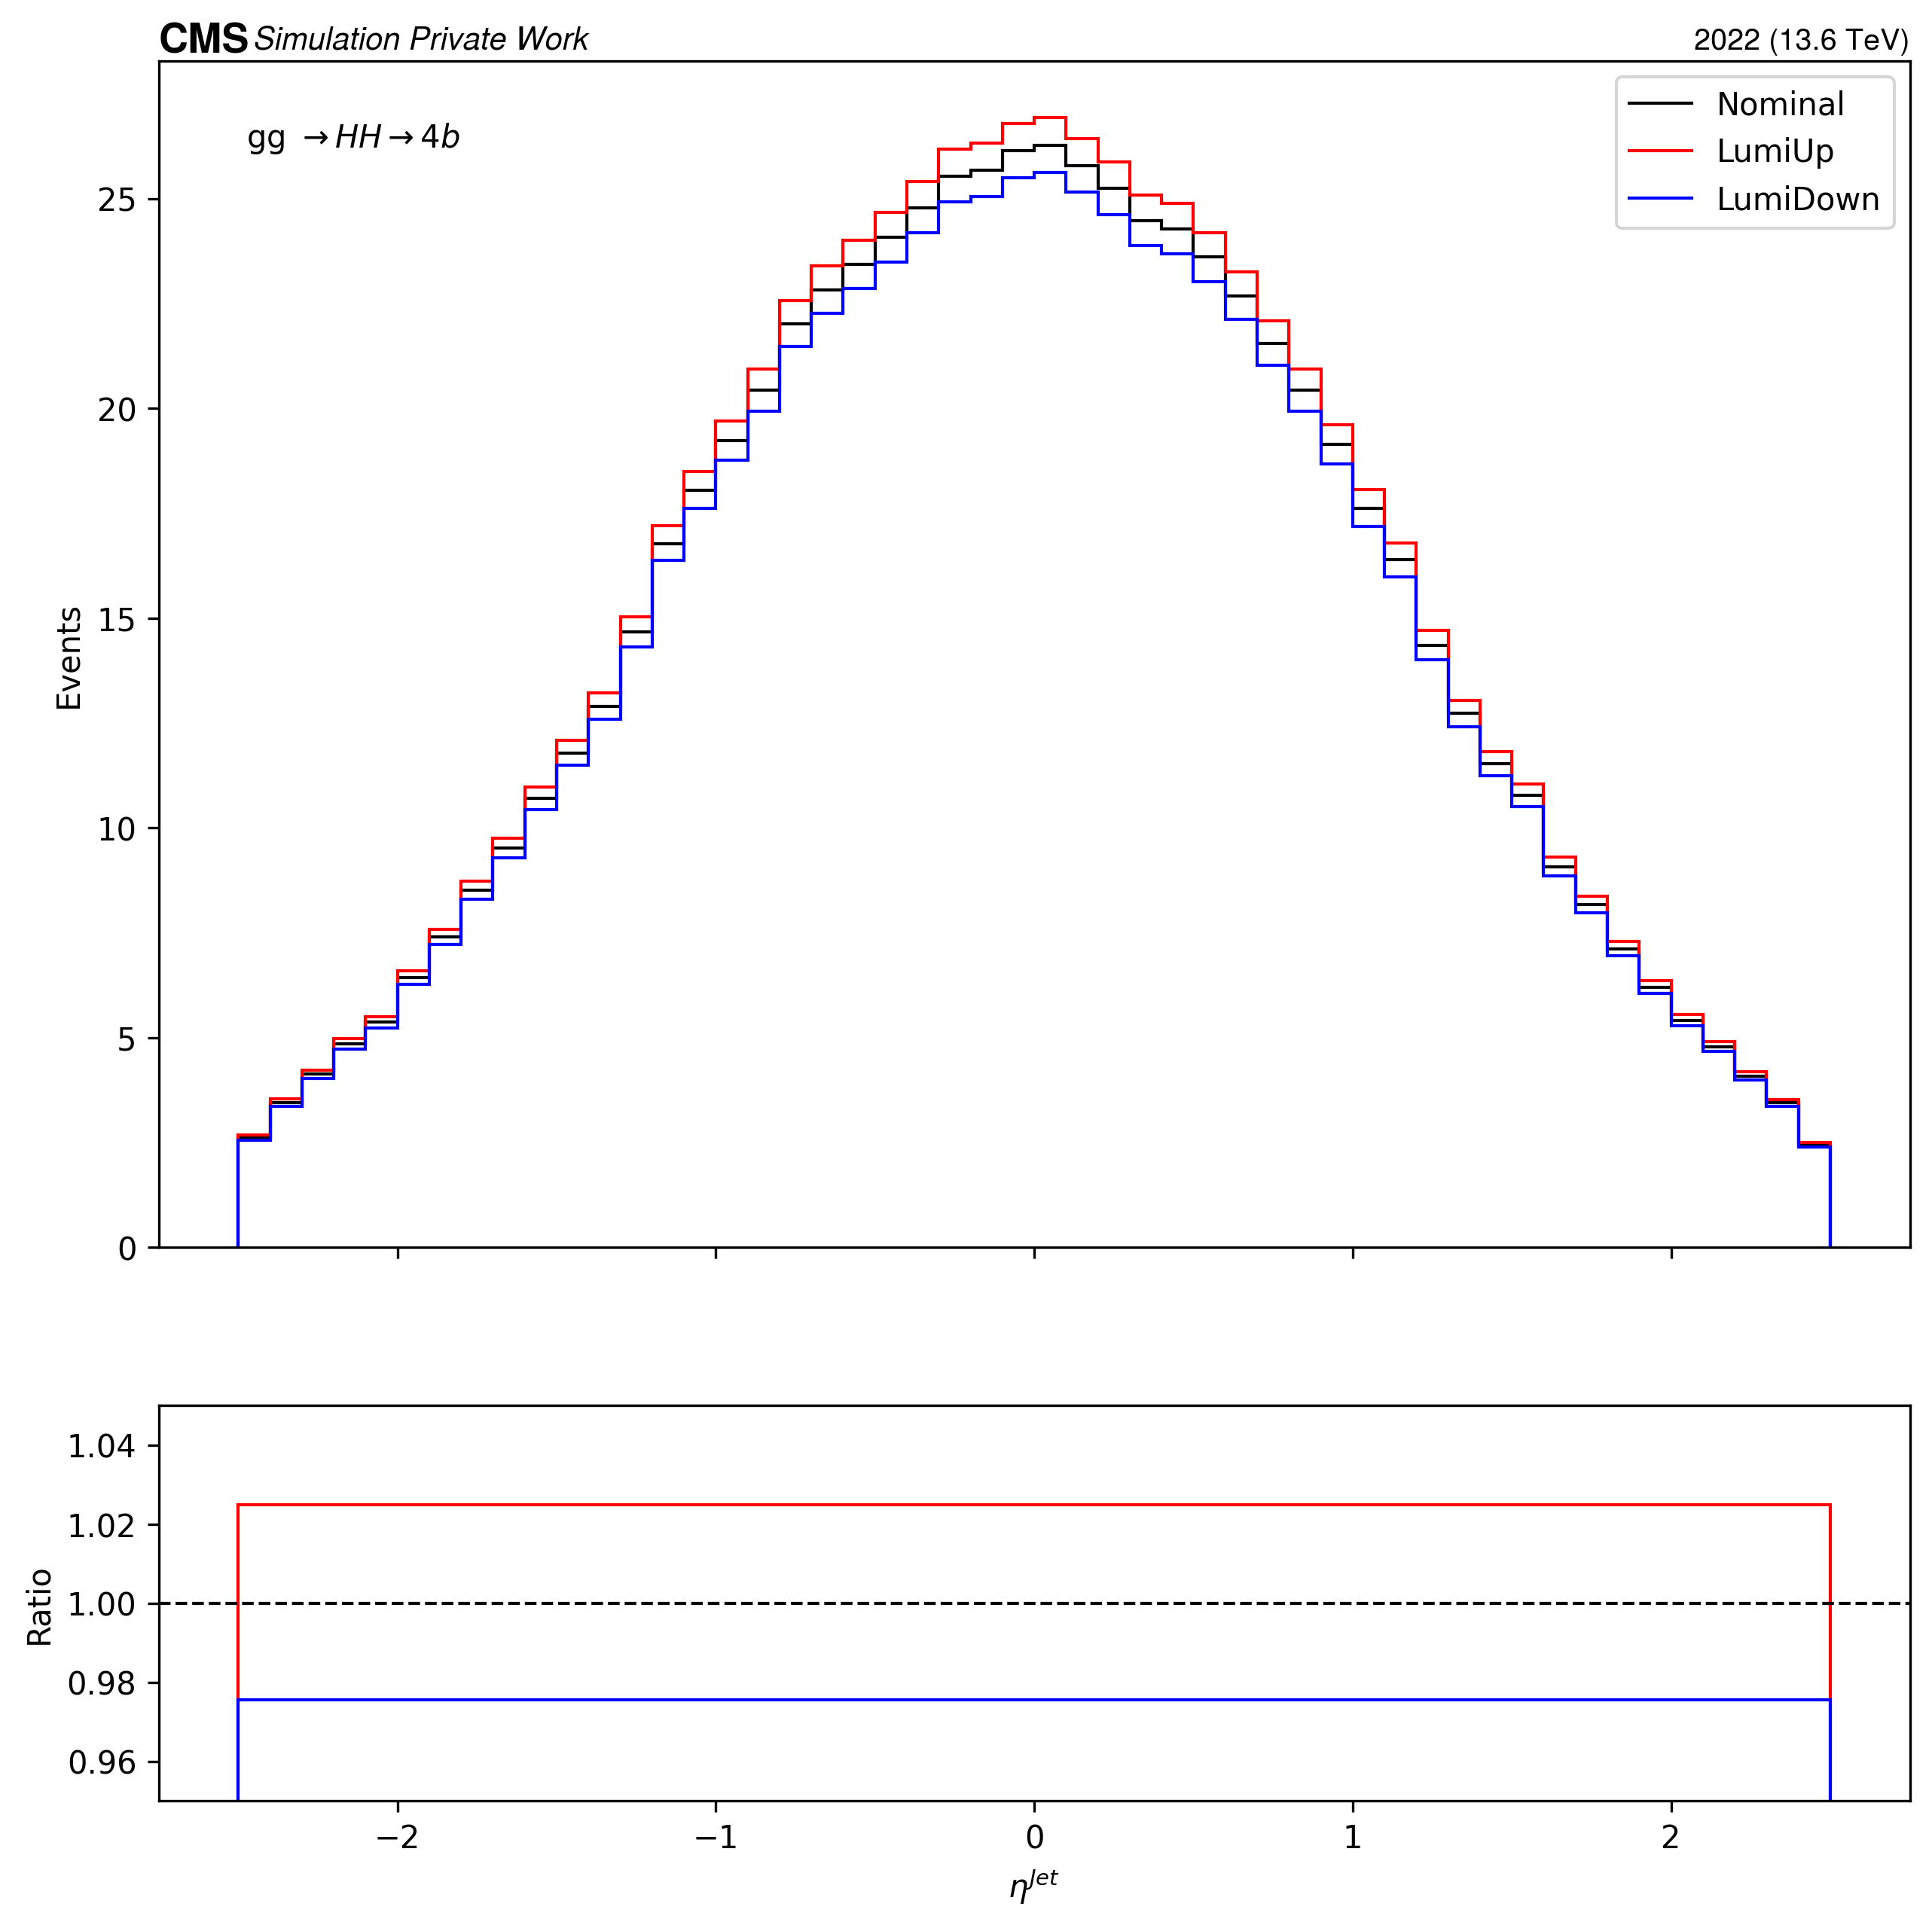

In [55]:
histo_nominal = np.array([h[0, 0, i].value for i in range(50)])
histo_up = np.array([h[0, 2, i].value for i in range(50)])
histo_down = np.array([h[0, 1, i].value for i in range(50)])

bins = np.linspace(-2.5, 2.5, 51)

plot_func(histo_nominal, histo_up, histo_down, bins, r"$\eta^{Jet}$", "Lumi")

Hist(
  StrCategory(['baseline'], name='cat', label='Category'),
  StrCategory(['nominal', 'luminosityDown', 'luminosityUp', 'pileupDown', 'pileupUp', 'xsec_ggHH4bDown', 'xsec_ggHH4bUp'], name='variation', label='Variation'),
  Regular(50, 0, 300, name='JetGood.pt', label='$p_{T}^{j}$ [GeV]'),
  storage=Weight()) # Sum: WeightedSum(value=5117.58, variance=7.21681) (WeightedSum(value=5213.78, variance=7.36288) with flow)


/tmp/ipykernel_68584/2257788849.py:27: RuntimeWarning: invalid value encountered in divide
  [histo_up / histo_nominal, histo_down / histo_nominal],


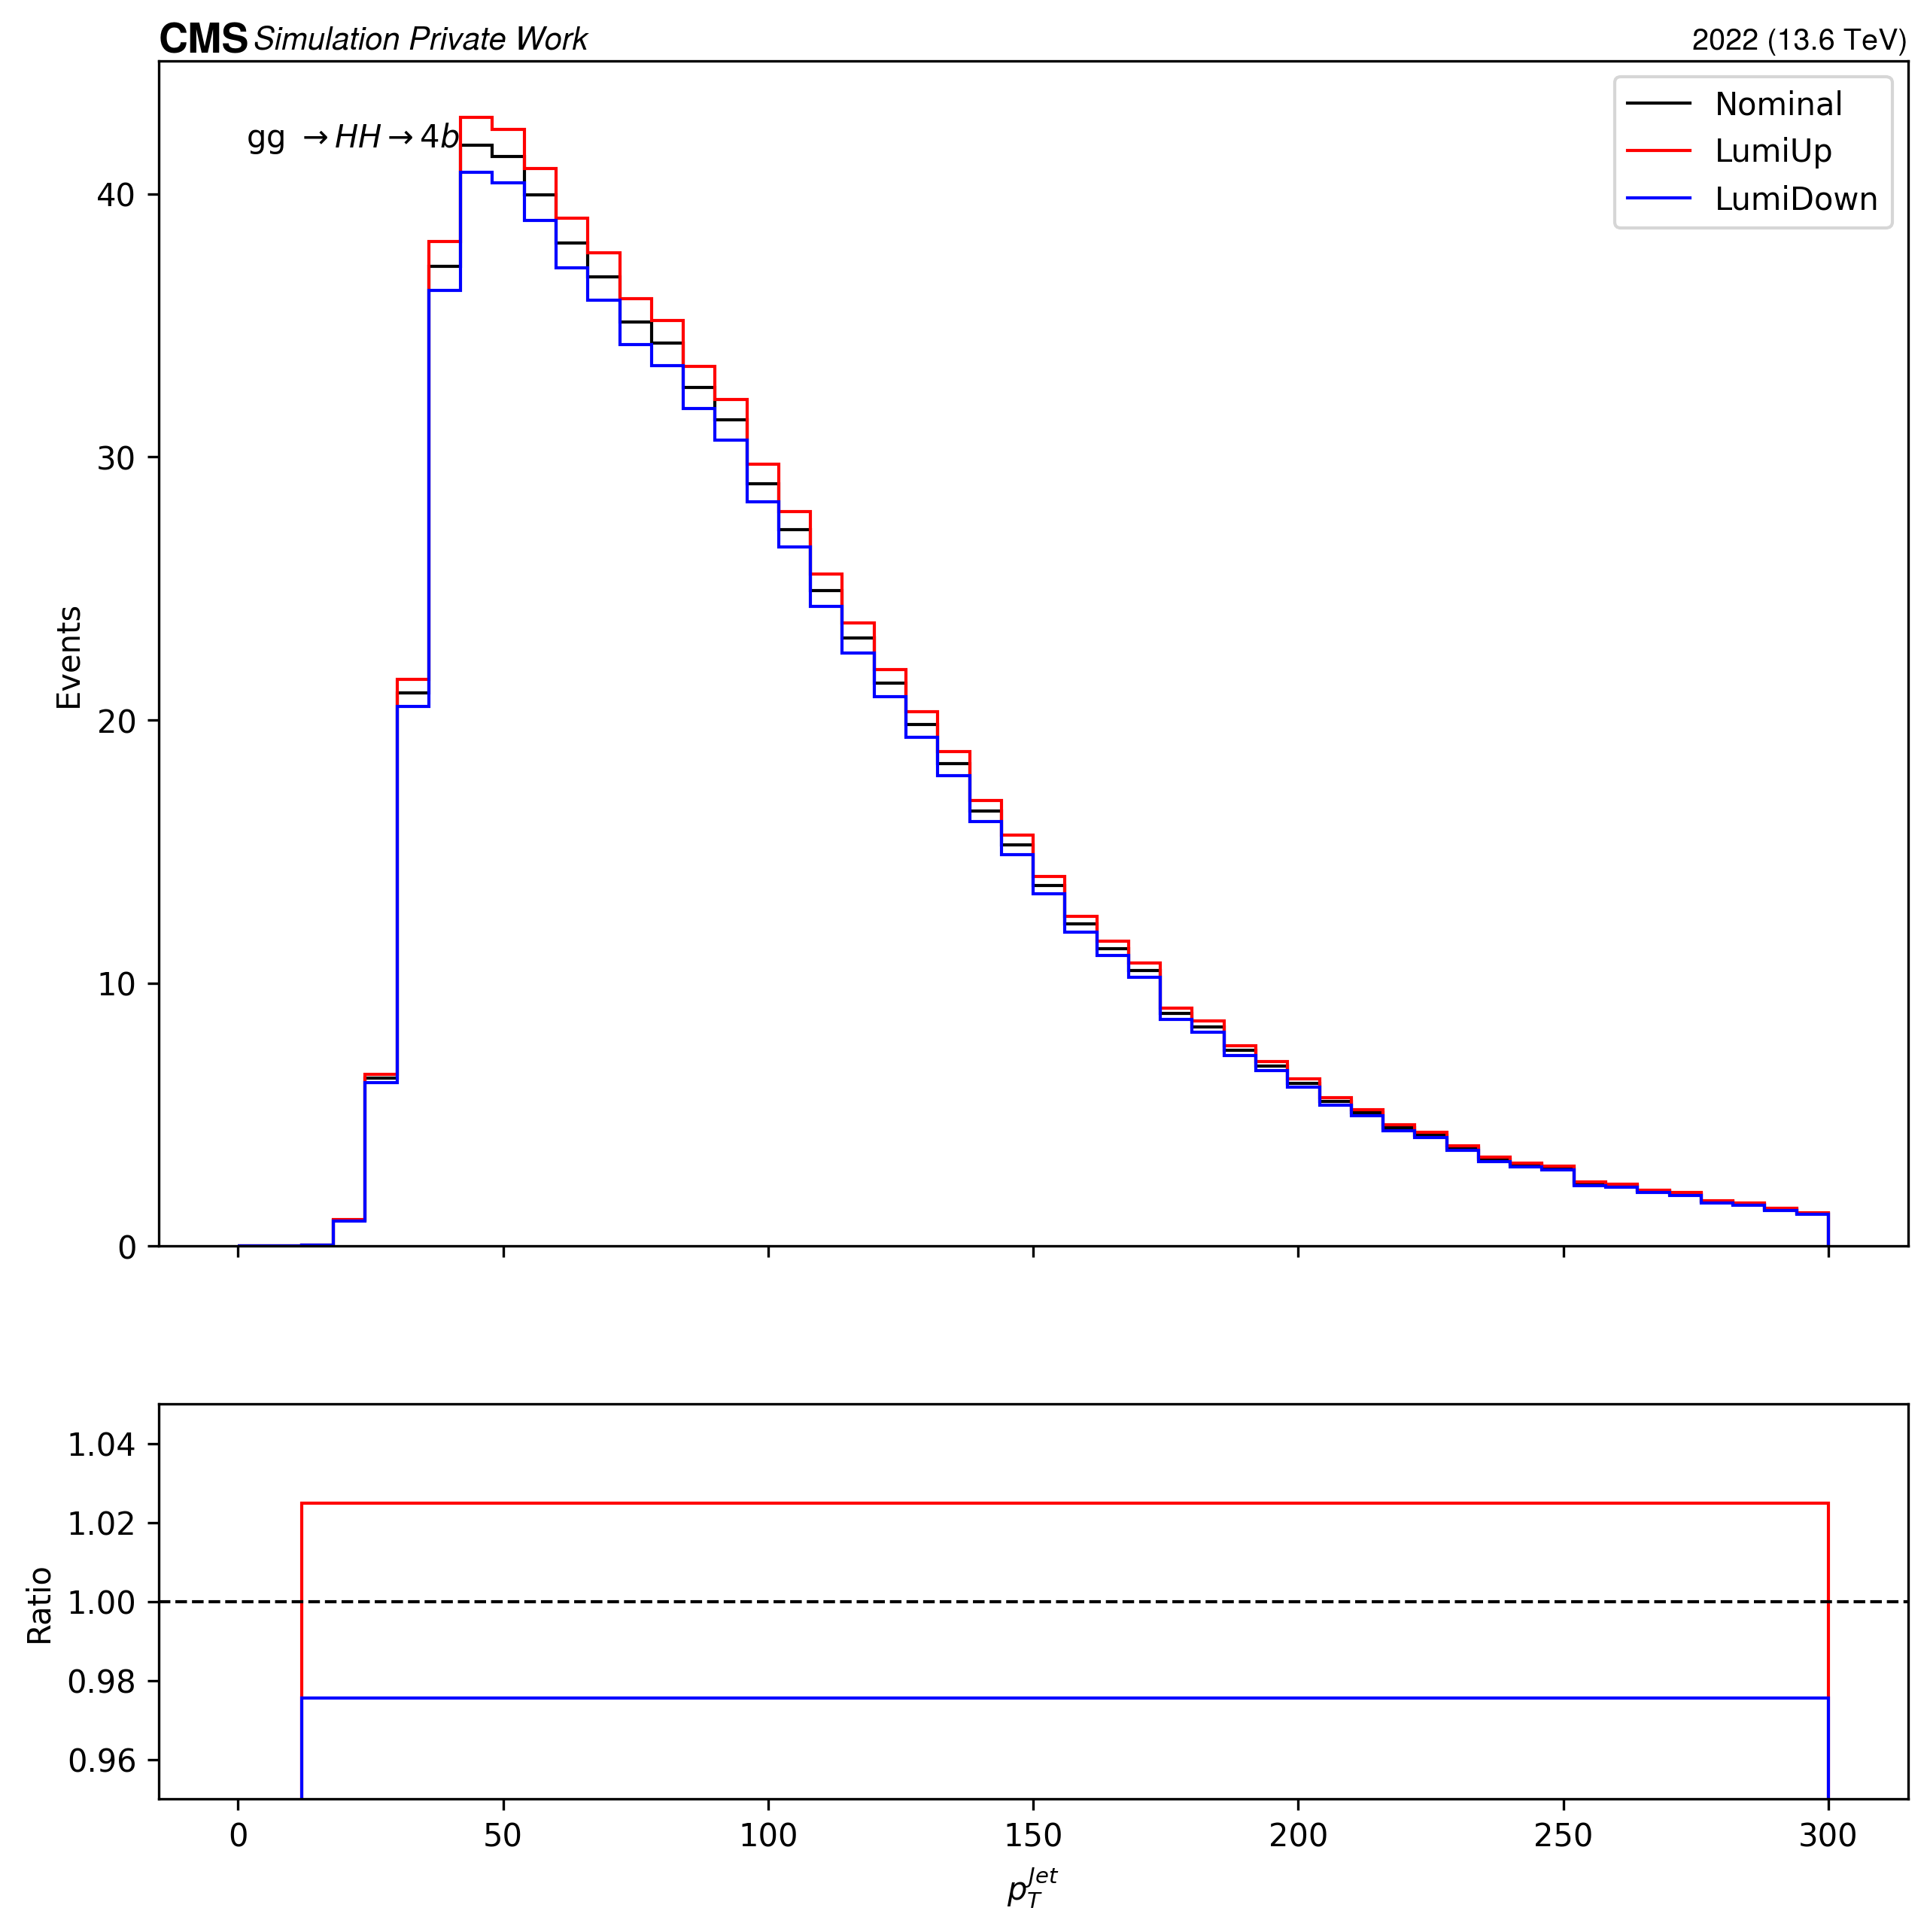

In [56]:
h1=vars["JetGood_pt"]['GluGlutoHHto4B']['GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2018']
print(h1)
histo_nominal1 = np.array([h1[0, 0, i].value for i in range(50)])
histo_up1 = np.array([h1[0, 2, i].value for i in range(50)])
histo_down1 = np.array([h1[0, 1, i].value for i in range(50)])

bins1 = np.linspace(0, 300, 51)

plot_func(histo_nominal1, histo_up1, histo_down1, bins1, r"$p_T^{Jet}$", "Lumi")

Hist(
  StrCategory(['baseline'], name='cat', label='Category'),
  StrCategory(['nominal', 'luminosityDown', 'luminosityUp', 'pileupDown', 'pileupUp', 'xsec_ggHH4bDown', 'xsec_ggHH4bUp'], name='variation', label='Variation'),
  Regular(50, -2.5, 2.5, name='JetGood.eta', label='$\\eta_{j}$'),
  storage=Weight()) # Sum: WeightedSum(value=5213.78, variance=7.36288)


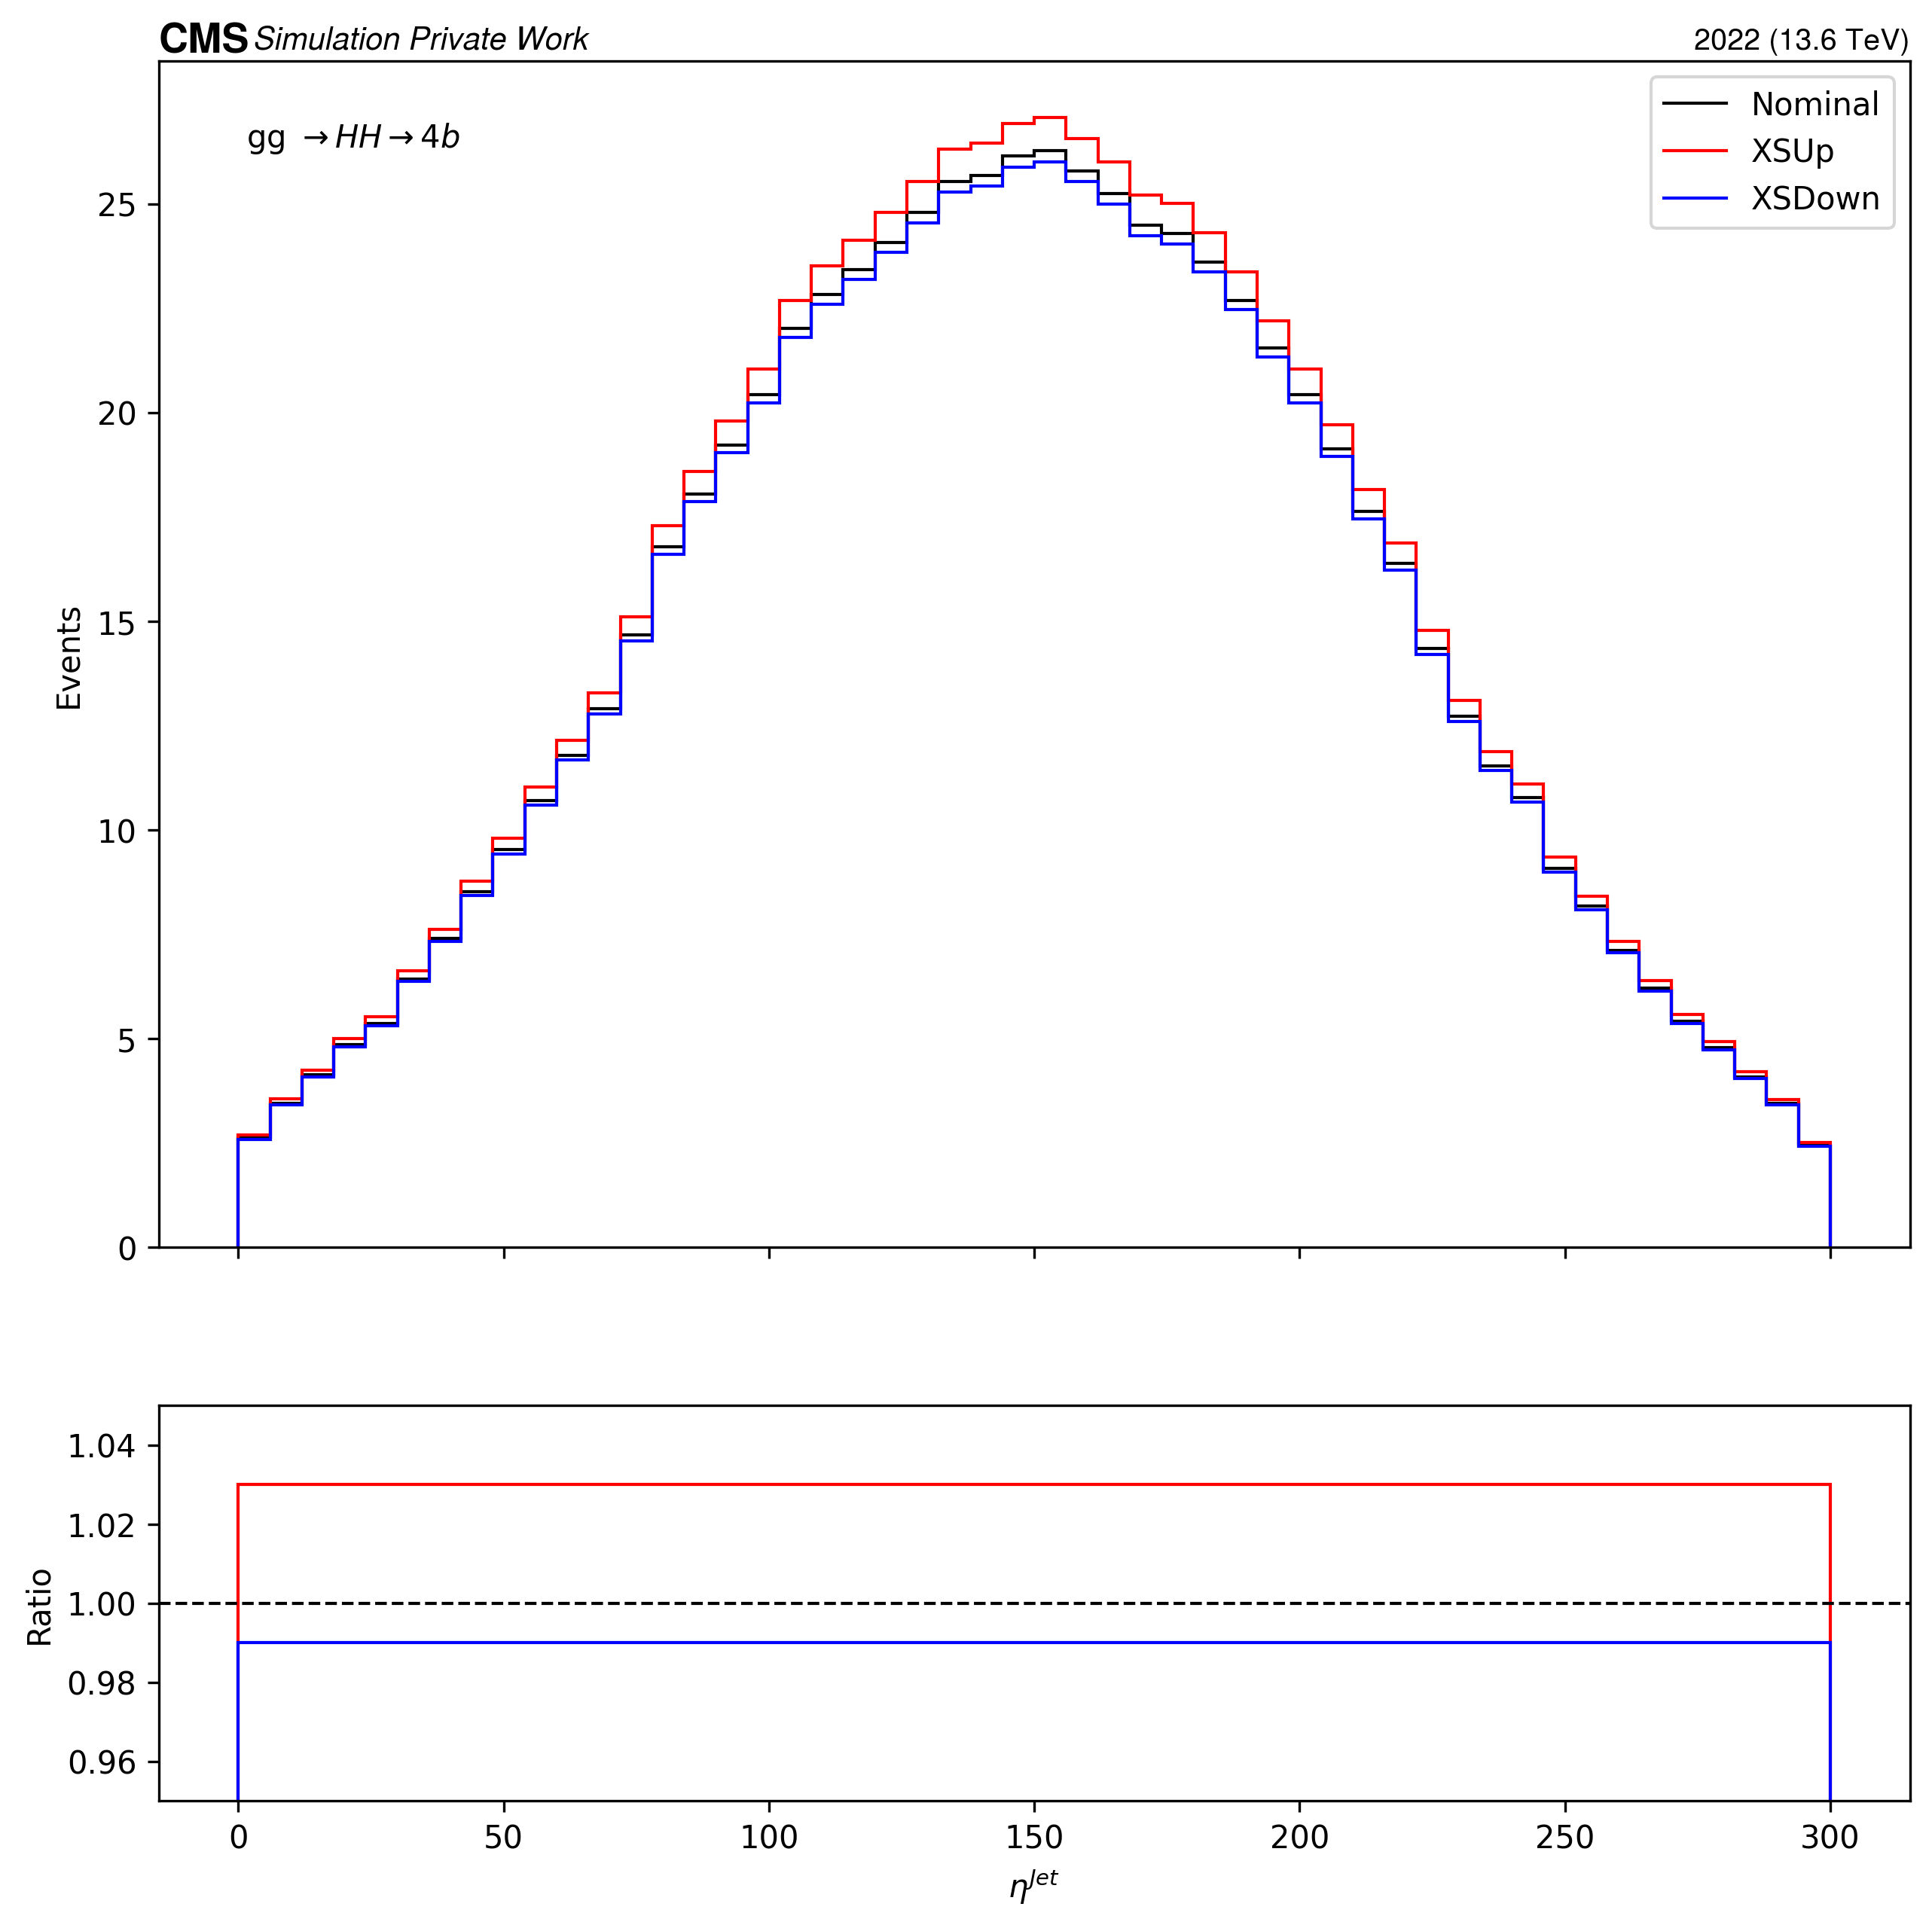

In [57]:
h2=vars["JetGood_eta"]['GluGlutoHHto4B']['GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2018']
print(h2)
histo_nominal2 = np.array([h2[0, 0, i].value for i in range(50)])
histo_up2 = np.array([h2[0, 5, i].value for i in range(50)])
histo_down2 = np.array([h2[0, 6, i].value for i in range(50)])

bins2 = np.linspace(0, 300, 51)

plot_func(histo_nominal2, histo_up2, histo_down2, bins2, r"$\eta^{Jet}$","XS")